# DELE CA1 Part A > Fashion MNIST

## Import General Dependencies

In [1]:
# Typing Dependencies
from typing import List, Tuple

# Data Manipulation Dependencies
import numpy as np
import pandas as pd

# Graphing Dependencies
import matplotlib.pyplot as plt
import seaborn as sb

# General Machine Learning Dependencies
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import ParameterSampler
from sklearn.metrics import *

# Deep Learning Dependencies
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import *

# Warnings
from warnings import filterwarnings

# Pickle
import pickle

In [ ]:
filterwarnings(action='ignore')

## Import Data

In [2]:
def load_data(train_only = False):
    from tensorflow.keras.datasets import fashion_mnist
    (X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
    if train_only:
        return X_train, y_train
    return X_train, y_train, X_test, y_test

In [10]:
def get_labels():
    return [
        'T-shirt/top',
        'Trouser',
        'Pullover',
        'Dress',
        'Coat',
        'Sandal',
        'Shirt',
        'Sneaker',
        'Bag',
        'Ankle boot'
    ]

## Exploratory Data Analysis

In [ ]:
def print_data_shapes():
    X_train, y_train, X_test, y_test = load_data()

    print('X_train shape:\t', X_train.shape)
    print('y_train shape:\t', y_train.shape)
    print('X_test shape:\t', X_test.shape)
    print('y_test shape:\t', y_test.shape)

print_data_shapes()

X_train shape:	 (60000, 28, 28)
y_train shape:	 (60000,)
X_test shape:	 (10000, 28, 28)
y_test shape:	 (10000,)


In [ ]:
def print_missing_values():
    X_train, y_train, X_test, y_test = load_data()

    print('X_train missing:', np.isnan(X_train).sum())
    print('y_train missing:', np.isnan(y_train).sum())
    print('X_test missing: ', np.isnan(X_test).sum())
    print('y_test missing: ', np.isnan(y_test).sum())

print_missing_values()

X_train missing: 0
y_train missing: 0
X_test missing:  0
y_test missing:  0


In [4]:
def print_class_distribution():
    _, y_train, _, y_test = load_data()
    y_train_tmp = y_train.flatten()
    y_test_tmp = y_test.flatten()
    print(pd.Series(y_train_tmp.flatten(), name='class distribution (train)').groupby(pd.Series(y_train_tmp)).count())
    print(pd.Series(y_test_tmp.flatten(), name='class distribution (test)').groupby(pd.Series(y_test_tmp)).count())

print_class_distribution()

0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
Name: class distribution (train), dtype: int64
0    1000
1    1000
2    1000
3    1000
4    1000
5    1000
6    1000
7    1000
8    1000
9    1000
Name: class distribution (test), dtype: int64


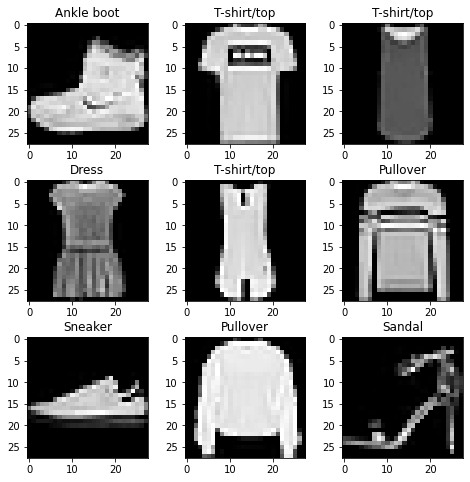

In [ ]:
def plot_samples():
    X_train, y_train = load_data(train_only=True)
    labels = get_labels()
    fig, ax = plt.subplots(3, 3, figsize=(8, 8))
    for i in range(9):
        current_ax = ax[i // 3, i % 3]
        current_ax.imshow(X_train[i], cmap='gray')
        current_ax.set_title(labels[y_train[i]])
    plt.subplots_adjust(hspace=0.3)

plot_samples()

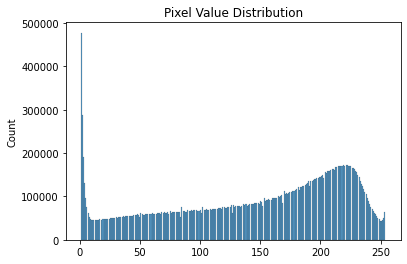

In [ ]:
# Depicts the distribution of all the pixel values (excluding 0 and 255),
#   to check for general image contrast
def plot_pixel_value_distribution():
    X_train, _ = load_data(train_only=True)

    ax = sb.histplot(x=X_train[(X_train > 0) & (X_train < 255)].flatten())
    ax.set_title('Pixel Value Distribution')

plot_pixel_value_distribution()

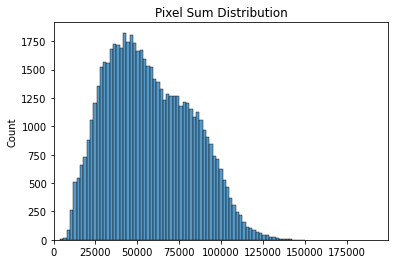

In [ ]:
# Depicts the distribution of the image pixel sums,
#   a simple check for adversarial samples (all black or all white)
#
# Since there are no samples at either end of the spectrum,
#   there aren't any of these adversarial samples
def plot_pixel_sum_distribution():
    X_train, _ = load_data(train_only=True)

    X_tmp = X_train.reshape(-1, 28 * 28)

    ax = sb.histplot(x=X_tmp.sum(axis=1))
    ax.set_title('Pixel Sum Distribution')
    ax.set_xlim((0, 255 * 28 * 28))

plot_pixel_sum_distribution()

In [ ]:
def plot_diagnostics(history):
    plt.plot(history.history['loss'], label='train loss')
    plt.plot(history.history['val_loss'], label='test loss')
    plt.plot(history.history['accuracy'], label='train acc')
    plt.plot(history.history['val_accuracy'], label='test acc')
    plt.legend()
    plt.show()

### Data Pre-Processing

In [7]:
def preprocess_data(X_train, y_train, X_test, y_test):
    from tensorflow.keras.utils import to_categorical
    
    X_train = X_train.astype(float) / 255.0
    X_test = X_test.astype(float) / 255.0

    y_train = to_categorical(y_train, 10)
    y_test = to_categorical(y_test, 10)
    return X_train.reshape(60000, 28, 28, 1), y_train, X_test.reshape(10000, 28, 28, 1), y_test

In [4]:
def load_preprocessed_data(train_only = False):
    X_train, y_train, X_test, y_test = preprocess_data(*load_data())

    if train_only:
        return X_train, y_train
    return X_train, y_train, X_test, y_test

## Baseline Models

Epoch 1/5
480/480 - 2s - loss: 0.6993 - accuracy: 0.7658 - val_loss: 0.5353 - val_accuracy: 0.8177 - 2s/epoch - 3ms/step
Epoch 2/5
480/480 - 1s - loss: 0.5030 - accuracy: 0.8294 - val_loss: 0.4821 - val_accuracy: 0.8397 - 1s/epoch - 2ms/step
Epoch 3/5
480/480 - 1s - loss: 0.4683 - accuracy: 0.8413 - val_loss: 0.4601 - val_accuracy: 0.8468 - 957ms/epoch - 2ms/step
Epoch 4/5
480/480 - 1s - loss: 0.4498 - accuracy: 0.8470 - val_loss: 0.4626 - val_accuracy: 0.8442 - 1s/epoch - 2ms/step
Epoch 5/5
480/480 - 1s - loss: 0.4370 - accuracy: 0.8512 - val_loss: 0.4442 - val_accuracy: 0.8490 - 896ms/epoch - 2ms/step


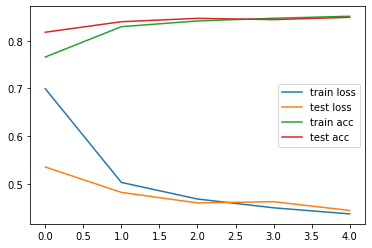

In [ ]:
# Simple Dense Neural Network
def baseline_1():
    X_train, y_train = load_preprocessed_data(train_only=True)
    dnn = Sequential(layers=[
        InputLayer(input_shape=(28, 28, 1)),
        Flatten(),
        Dense(units=10, activation='softmax')
    ])
    dnn.compile(loss='categorical_crossentropy', metrics=['accuracy'])
    history = dnn.fit(x=X_train, y=y_train, epochs=5, batch_size=100, validation_split=0.2, verbose=2)
    plot_diagnostics(history)

baseline_1()

Epoch 1/5
480/480 - 8s - loss: 0.5724 - accuracy: 0.8044 - val_loss: 0.4438 - val_accuracy: 0.8393 - 8s/epoch - 17ms/step
Epoch 2/5
480/480 - 8s - loss: 0.4011 - accuracy: 0.8573 - val_loss: 0.3904 - val_accuracy: 0.8620 - 8s/epoch - 16ms/step
Epoch 3/5
480/480 - 7s - loss: 0.3593 - accuracy: 0.8723 - val_loss: 0.3927 - val_accuracy: 0.8582 - 7s/epoch - 16ms/step
Epoch 4/5
480/480 - 7s - loss: 0.3331 - accuracy: 0.8798 - val_loss: 0.3663 - val_accuracy: 0.8712 - 7s/epoch - 16ms/step
Epoch 5/5
480/480 - 7s - loss: 0.3140 - accuracy: 0.8876 - val_loss: 0.3689 - val_accuracy: 0.8672 - 7s/epoch - 16ms/step


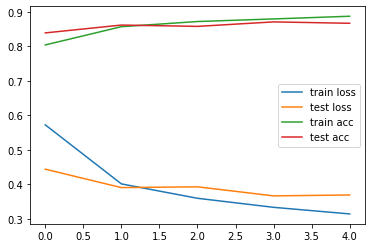

In [ ]:
# Simple Convolutional Neural Network
def baseline_2():
    X_train, y_train = load_preprocessed_data(train_only=True)
    cnn = Sequential(layers=[
        InputLayer(input_shape=(28, 28, 1)),
        Conv2D(filters=3, kernel_size=3),
        Flatten(),
        Dense(units=30, activation='relu'),
        Dense(units=10, activation='softmax')
    ])
    cnn.compile(loss='categorical_crossentropy', metrics=['accuracy'])
    history = cnn.fit(x=X_train, y=y_train, epochs=5, batch_size=100, validation_split=0.2, verbose=2)
    plot_diagnostics(history)

baseline_2()

Epoch 1/5
480/480 - 15s - loss: 0.4621 - accuracy: 0.8373 - val_loss: 0.4150 - val_accuracy: 0.8741 - 15s/epoch - 30ms/step
Epoch 2/5
480/480 - 14s - loss: 0.3021 - accuracy: 0.8902 - val_loss: 0.3081 - val_accuracy: 0.8881 - 14s/epoch - 28ms/step
Epoch 3/5
480/480 - 14s - loss: 0.2578 - accuracy: 0.9066 - val_loss: 0.3045 - val_accuracy: 0.8941 - 14s/epoch - 28ms/step
Epoch 4/5
480/480 - 13s - loss: 0.2320 - accuracy: 0.9148 - val_loss: 0.2740 - val_accuracy: 0.9015 - 13s/epoch - 28ms/step
Epoch 5/5
480/480 - 14s - loss: 0.2106 - accuracy: 0.9226 - val_loss: 0.2900 - val_accuracy: 0.8970 - 14s/epoch - 28ms/step


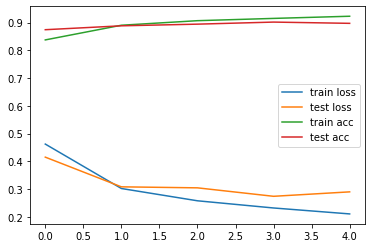

In [ ]:
# Convolutional Neural Network with Logical Architecture
def baseline_3():
    X_train, y_train = load_preprocessed_data(train_only=True)
    cnn = Sequential(layers=[
        InputLayer(input_shape=(28, 28, 1)),
        Conv2D(filters=8, kernel_size=3, activation='relu'),
        MaxPool2D(pool_size=2, strides=2),
        Conv2D(filters=10, kernel_size=3, activation='relu'),
        BatchNormalization(),
        Flatten(),
        Dense(units=32, activation='relu'),
        Dense(units=16, activation='relu'),
        Dense(units=10, activation='softmax')
    ])
    cnn.compile(loss='categorical_crossentropy', metrics=['accuracy'])
    history = cnn.fit(x=X_train, y=y_train, epochs=5, batch_size=100, validation_split=0.2, verbose=2)
    plot_diagnostics(history)

baseline_3()

## Hyper-Parameter Tuning

### Random Search

In [ ]:
def random_search_fashion_mnist(
    learning_rate=[0.005, 0.01, 0.02],
    dropout_rate=[0.2, 0.3, 0.5],
    dense_units=[32, 64],
    conv_filters=[16, 32, 64],
    batch_size=[50, 100],
    samples=10, 
    min_delta=0.005,
    patience=3
):
    X_train, y_train, X_test, y_test = load_preprocessed_data()

    def create_model(conv_filters, dense_units, dropout_rate, learning_rate):
        model = Sequential(layers=[
            InputLayer(input_shape=(28, 28, 1)),
            Conv2D(filters=conv_filters, kernel_size=3, activation='relu'),
            BatchNormalization(),
            Conv2D(filters=conv_filters * 2, kernel_size=3, activation='relu'),
            MaxPool2D(pool_size=2),
            Conv2D(filters=conv_filters * 4, kernel_size=3, activation='relu'),
            BatchNormalization(),
            Flatten(),
            Dense(units=dense_units / 2, activation='relu'),
            BatchNormalization(),
            Dropout(dropout_rate),
            Dense(units=dense_units, activation='relu'),
            BatchNormalization(),
            Dropout(dropout_rate),
            Dense(units=dense_units / 2, activation='relu'),
            Dropout(dropout_rate),
            Dense(units=10, activation='softmax')
        ])
        model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])
        return model
    
    early_stopping = EarlyStopping(monitor='val_loss', min_delta=min_delta, patience=patience)

    params = {
        'conv_filters': conv_filters,
        'dense_units': dense_units,
        'dropout_rate': dropout_rate,
        'learning_rate': learning_rate,
        'batch_size': batch_size
    }

    param_grid = ParameterSampler(param_distributions=params, n_iter=samples)
    ls = []
    for params in param_grid:
        clf = KerasClassifier(build_fn=create_model, callbacks=[early_stopping], epochs=50, validation_split=0.2, verbose=0)
        clf.set_params(**params)
        history = clf.fit(X_train, y_train)
        params['loss'] = np.min(history.history['loss'][-3:])
        params['accuracy'] = np.max(history.history['accuracy'][-3:])
        params['val_loss'] = np.min(history.history['val_loss'][-3:])
        params['val_accuracy'] = np.max(history.history['val_accuracy'][-3:])
        params['test_accuracy'] = clf.score(X_test, y_test)
        params['geo_mean_loss'] = np.sqrt(params['loss'] * params['val_loss'])
        params['geo_mean_acc'] = np.cbrt(params['accuracy'] * params['val_accuracy'] * params['test_accuracy'])
        ls.append(pd.Series(params).to_frame().T)
    return pd.concat(ls, axis=0).reset_index(drop=True)

In [ ]:
# gs_results_1 = random_search_fashion_mnist(samples=10)

In [13]:
with open('../models/a/gs_results_1.p', 'rb') as f:
    gs_results_1 = pickle.load(f)

In [14]:
gs_results_1.sort_values('geo_mean_loss')

,learning_rate,dropout_rate,dense_units,conv_filters,batch_size,loss,accuracy,val_loss,val_accuracy,test_accuracy,geo_mean_loss,geo_mean_acc
1,0.020,0.2,32.0,64.0,50.0,0.326845,0.899354,0.253334,0.920500,0.9049,0.287752,0.908207
4,0.005,0.5,64.0,32.0,100.0,0.392231,0.877354,0.271753,0.910750,0.9034,0.326481,0.897053
9,0.010,0.3,32.0,32.0,50.0,0.408637,0.868187,0.284146,0.911667,0.9074,0.340753,0.895535
0,0.020,0.2,64.0,32.0,50.0,0.370017,0.877542,0.351082,0.874833,0.8698,0.360425,0.874052
2,0.010,0.5,64.0,64.0,50.0,0.460152,0.854042,0.300634,0.902167,0.8947,0.371937,0.883380
6,0.020,0.5,64.0,16.0,50.0,0.697935,0.751875,0.425363,0.843917,0.8360,0.544863,0.809501
5,0.005,0.5,32.0,64.0,50.0,0.835185,0.666104,0.451869,0.807250,0.7925,0.614324,0.752517
7,0.005,0.5,32.0,32.0,50.0,0.846858,0.661875,0.493676,0.802000,0.7733,0.646586,0.743189
3,0.020,0.5,32.0,16.0,100.0,0.999314,0.602417,0.649237,0.748500,0.7366,0.805476,0.692533
8,0.020,0.5,32.0,32.0,50.0,1.017881,0.590208,0.691030,0.771833,0.7724,0.838682,0.705977


In [ ]:
# gs_results_2 = random_search_fashion_mnist(learning_rate=[0.01, 0.015, 0.02], dropout_rate=[0.2, 0.3], dense_units=[32], conv_filters=[32, 64], batch_size=[50, 100], samples=10)

In [15]:
with open('../models/a/gs_results_2.p', 'rb') as f:
    gs_results_2 = pickle.load(f)

In [16]:
gs_results_2.sort_values('geo_mean_loss')

,learning_rate,dropout_rate,dense_units,conv_filters,batch_size,loss,accuracy,val_loss,val_accuracy,test_accuracy,geo_mean_loss,geo_mean_acc
0,0.020,0.2,32.0,64.0,50.0,0.277400,0.913000,0.276643,0.920417,0.9166,0.277021,0.916667
7,0.015,0.2,32.0,32.0,100.0,0.291291,0.906333,0.265806,0.908083,0.8903,0.278257,0.901537
3,0.010,0.2,32.0,64.0,100.0,0.306526,0.901146,0.278528,0.904833,0.8961,0.292192,0.900686
6,0.015,0.2,32.0,64.0,100.0,0.322612,0.896292,0.283080,0.905167,0.8847,0.302200,0.895347
4,0.015,0.3,32.0,32.0,100.0,0.372041,0.883563,0.278413,0.914417,0.9089,0.321840,0.902192
5,0.010,0.2,32.0,32.0,100.0,0.334859,0.891771,0.325696,0.897583,0.8737,0.330246,0.887626
9,0.020,0.3,32.0,32.0,100.0,0.412564,0.865042,0.286979,0.903750,0.8927,0.344089,0.887014
2,0.020,0.3,32.0,64.0,50.0,0.407544,0.866000,0.293884,0.914583,0.8997,0.346079,0.893195
1,0.020,0.3,32.0,32.0,50.0,0.457748,0.851729,0.292495,0.906917,0.9039,0.365908,0.887149
8,0.010,0.3,32.0,32.0,50.0,0.465324,0.847000,0.323907,0.893750,0.8595,0.388229,0.866526


In [ ]:
# gs_results_3 = random_search_fashion_mnist(learning_rate=[0.01], dropout_rate=[0.2], dense_units=[32], conv_filters=[64], batch_size=[50], samples=1, min_delta=0.001, patience=5)

In [17]:
with open('../models/a/gs_results_3.p', 'rb') as f:
    gs_results_3 = pickle.load(f)

In [18]:
gs_results_3

,learning_rate,dropout_rate,dense_units,conv_filters,batch_size,loss,accuracy,val_loss,val_accuracy,test_accuracy,geo_mean_loss,geo_mean_acc
0,0.01,0.2,32.0,64.0,50.0,0.229209,0.92925,0.280344,0.91975,0.9134,0.25349,0.920777


### Fine Tuning

1875/1875 [==============================] - 14s 7ms/step - loss: 0.1590 - accuracy: 0.9487
[0.15896904468536377, 0.9486833214759827]
313/313 [==============================] - 3s 9ms/step - loss: 0.2667 - accuracy: 0.9161
[0.2667282819747925, 0.916100025177002]


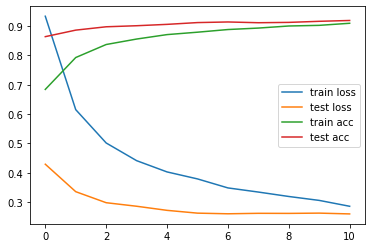

In [ ]:
def fine_tune_fashion_mnist(learning_rate, dropout_rate, dense_units, conv_filters, epochs):
    X_train, y_train, X_test, y_test = load_preprocessed_data()

    model = Sequential(layers=[
        InputLayer(input_shape=(28, 28, 1)),
        Conv2D(filters=conv_filters, kernel_size=3, activation='relu'),
        BatchNormalization(),
        Conv2D(filters=conv_filters * 2, kernel_size=3, activation='relu'),
        MaxPool2D(pool_size=2),
        Conv2D(filters=conv_filters * 4, kernel_size=3, activation='relu'),
        BatchNormalization(),
        Flatten(),
        Dense(units=dense_units / 2, activation='relu'),
        BatchNormalization(),
        Dropout(dropout_rate),
        Dense(units=dense_units, activation='relu'),
        BatchNormalization(),
        Dropout(dropout_rate),
        Dense(units=dense_units / 2, activation='relu'),
        Dropout(dropout_rate),
        Dense(units=10, activation='softmax')
    ])
    
    model.compile(optimizer=SGD(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])
    
    early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.0005, patience=4)

    history = model.fit(X_train, y_train, validation_split=0.2, epochs=epochs, callbacks=[early_stopping], verbose=0)

    print(model.evaluate(X_train, y_train))
    print(model.evaluate(X_test, y_test))

    plot_diagnostics(history)

fine_tune_fashion_mnist(learning_rate=0.01, dropout_rate=0.2, dense_units=32, conv_filters=64, epochs=20)

1875/1875 [==============================] - 12s 6ms/step - loss: 0.1528 - accuracy: 0.9512
[0.15283098816871643, 0.9511666893959045]
313/313 [==============================] - 3s 8ms/step - loss: 0.2841 - accuracy: 0.9133
[0.28408321738243103, 0.9132999777793884]


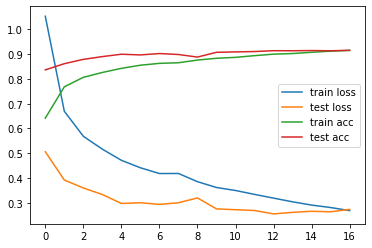

In [ ]:
def fine_tune_fashion_mnist_2(learning_rate, dropout_rate, dense_units, conv_filters, epochs):
    X_train, y_train, X_test, y_test = load_preprocessed_data()
    
    model = Sequential(layers=[
        InputLayer(input_shape=(28, 28, 1)),
        Conv2D(filters=conv_filters, kernel_size=3, activation='relu'),
        Conv2D(filters=conv_filters * 2, kernel_size=3, activation='relu'),
        MaxPool2D(pool_size=2, strides=2),
        Conv2D(filters=conv_filters * 4, kernel_size=3, activation='relu'),
        BatchNormalization(),
        Flatten(),
        Dense(units=dense_units / 2, activation='relu'),
        BatchNormalization(),
        Dropout(dropout_rate),
        Dense(units=dense_units, activation='relu'),
        BatchNormalization(),
        Dropout(dropout_rate),
        Dense(units=dense_units / 2, activation='relu'),
        Dropout(dropout_rate),
        Dense(units=10, activation='softmax')
    ])
    model.compile(optimizer=SGD(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])
    
    early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.0005, patience=4)

    history = model.fit(X_train, y_train, validation_split=0.2, epochs=epochs, callbacks=[early_stopping], verbose=0)
    
    print(model.evaluate(X_train, y_train))
    print(model.evaluate(X_test, y_test))
    
    plot_diagnostics(history)

fine_tune_fashion_mnist_2(learning_rate=0.008, dropout_rate=0.2, dense_units=32, conv_filters=64, epochs=30)

1875/1875 [==============================] - 12s 6ms/step - loss: 0.1780 - accuracy: 0.9410
[0.17799335718154907, 0.9410499930381775]
313/313 [==============================] - 3s 8ms/step - loss: 0.2876 - accuracy: 0.9099
[0.2875794470310211, 0.9099000096321106]


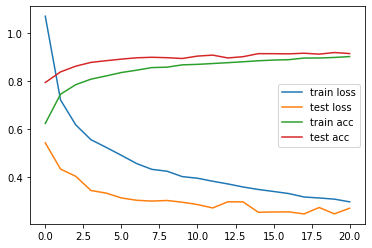

In [ ]:
def fine_tune_fashion_mnist_3(learning_rate, dropout_rate, dense_units, conv_filters, epochs):
    X_train, y_train, X_test, y_test = load_preprocessed_data()
    
    model = Sequential(layers=[
        InputLayer(input_shape=(28, 28, 1)),
        Conv2D(filters=conv_filters, kernel_size=3, activation='relu'),
        Conv2D(filters=conv_filters * 2, kernel_size=3, activation='relu'),
        MaxPool2D(pool_size=2, strides=2),
        Dropout(0.15),
        Conv2D(filters=conv_filters * 4, kernel_size=3, activation='relu'),
        Dropout(0.15),
        BatchNormalization(),
        Flatten(),
        Dense(units=dense_units / 2, activation='relu'),
        BatchNormalization(),
        Dropout(dropout_rate),
        Dense(units=dense_units, activation='relu'),
        BatchNormalization(),
        Dropout(dropout_rate),
        Dense(units=dense_units / 2, activation='relu'),
        Dropout(dropout_rate),
        Dense(units=10, activation='softmax')
    ])
    model.compile(optimizer=SGD(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])
    
    early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=3)

    history = model.fit(X_train, y_train, validation_split=0.2, epochs=epochs, callbacks=[early_stopping], verbose=0)

    print(model.evaluate(X_train, y_train))
    print(model.evaluate(X_test, y_test))
    
    plot_diagnostics(history)

fine_tune_fashion_mnist_3(learning_rate=0.008, dropout_rate=0.2, dense_units=32, conv_filters=64, epochs=30)

1875/1875 [==============================] - 10s 5ms/step - loss: 0.1258 - accuracy: 0.9552
[0.12583692371845245, 0.955216646194458]
313/313 [==============================] - 2s 7ms/step - loss: 0.2380 - accuracy: 0.9219
[0.23795868456363678, 0.9218999743461609]


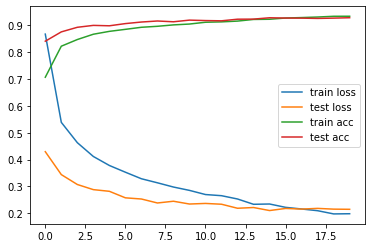

In [ ]:
def fine_tune_fashion_mnist_4(learning_rate, batch_size, epochs):
    X_train, y_train, X_test, y_test = load_preprocessed_data()
    
    model = Sequential(layers=[
        InputLayer(input_shape=(28, 28, 1)),
        Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'),
        Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
        MaxPool2D(pool_size=2, strides=2),
        Dropout(0.15),
        Conv2D(filters=128, kernel_size=3, activation='relu'),
        Dropout(0.15),
        BatchNormalization(),
        Flatten(),
        Dense(units=64, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),
        Dense(units=64, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),
        Dense(units=32, activation='relu'),
        Dropout(0.3),
        Dense(units=10, activation='softmax')
    ])
    model.compile(optimizer=SGD(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])
    
    early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)

    history = model.fit(X_train, y_train, validation_split=0.2, epochs=epochs, callbacks=[early_stopping], verbose=0)

    print(model.evaluate(X_train, y_train))
    print(model.evaluate(X_test, y_test))
    
    plot_diagnostics(history)

fine_tune_fashion_mnist_4(learning_rate=0.008, batch_size=50, epochs=30)

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_81 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 conv2d_82 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 dropout_84 (Dropout)        (None, 14, 14, 64)        0         
                                                                 
 conv2d_83 (Conv2D)          (None, 12, 12, 128)       73856     
                                                                 
 dropout_85 (Dropout)        (None, 12, 12, 128)       0         
                                                     

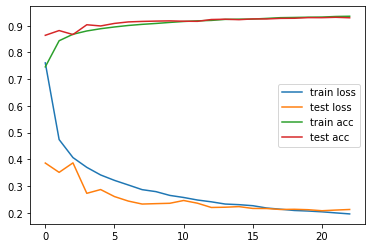

In [ ]:
def final_model_fashion_mnist(learning_rate, epochs):
    X_train, y_train, X_test, y_test = load_preprocessed_data()

    model = Sequential(layers=[
        InputLayer(input_shape=(28, 28, 1)),
        Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'),
        Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
        MaxPool2D(pool_size=2, strides=2),
        Dropout(0.15),
        Conv2D(filters=128, kernel_size=3, activation='relu'),
        Dropout(0.15),
        BatchNormalization(),
        Flatten(),
        Dense(units=64, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),
        Dense(units=64, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),
        Dense(units=32, activation='relu'),
        Dropout(0.3),
        Dense(units=10, activation='softmax')
    ])

    def exp_decay(epoch):
        from math import exp
        initial_lr = 0.01
        k = 0.1
        return initial_lr * exp(-k * epoch)

    model.compile(optimizer=SGD(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    
    early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.005, patience=5)
    decaying_lr = LearningRateScheduler(exp_decay)

    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, callbacks=[early_stopping, decaying_lr], verbose=0)
    
    print(model.evaluate(X_train, y_train))
    print(model.evaluate(X_test, y_test))

    plot_diagnostics(history)

    return model

model = final_model_fashion_mnist(learning_rate=0.01, epochs=40)

In [ ]:
# model.save('../models/a/model.h5')

## Final Model

### Load Model

In [5]:
model = load_model('../models/a/model.h5')

### Model Evaluation

In [8]:
def evaluate_final_model_metrics(model):
    X_train, y_train, X_test, y_test = load_preprocessed_data()

    train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

    print('Training Loss:\t', train_loss)
    print('Testing Loss:\t', test_loss)

    print('Training Acc:\t', train_acc)
    print('Testing Acc:\t', test_acc)

evaluate_final_model_metrics(model)

Training Loss:	 0.09833472222089767
Testing Loss:	 0.21210336685180664
Training Acc:	 0.9641500115394592
Testing Acc:	 0.9296000003814697


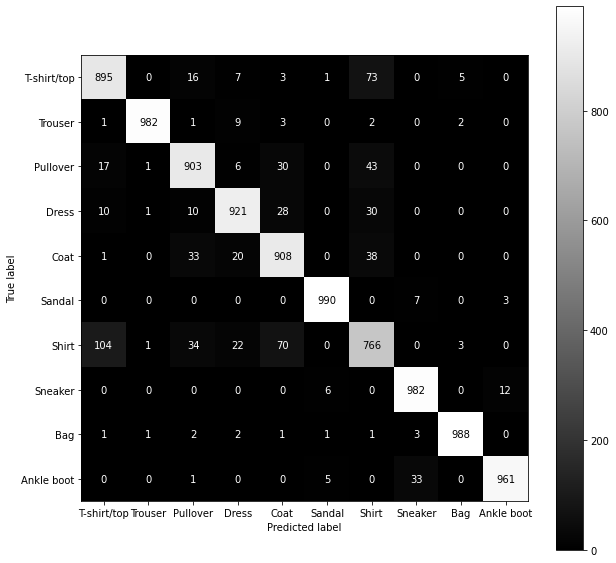

In [ ]:
def evaluate_final_model_predictions(model):
    X_train, y_train, X_test, y_test = load_preprocessed_data()

    fig, ax = plt.subplots(1, 1, figsize=(10, 10))

    y_true = y_test.argmax(axis=1)
    y_pred = model.predict(X_test).argmax(axis=1)

    ConfusionMatrixDisplay.from_predictions(y_true, y_pred, display_labels=get_labels(), cmap='gray', ax=ax)

evaluate_final_model_predictions(model)

99% Confidence Accuracy: 0.9950897867564534
Actual: Ankle boot   | Predicted: Sneaker      | Frequency: 3
Actual: Ankle boot   | Predicted: Sandal       | Frequency: 2
Actual: Bag          | Predicted: Sandal       | Frequency: 1
Actual: Bag          | Predicted: Sneaker      | Frequency: 1
Actual: Coat         | Predicted: Shirt        | Frequency: 2
Actual: Coat         | Predicted: Dress        | Frequency: 1
Actual: Dress        | Predicted: Coat         | Frequency: 2
Actual: Pullover     | Predicted: Coat         | Frequency: 2
Actual: Pullover     | Predicted: Dress        | Frequency: 2
Actual: Pullover     | Predicted: Trouser      | Frequency: 1
Actual: Sandal       | Predicted: Sneaker      | Frequency: 2
Actual: Shirt        | Predicted: Bag          | Frequency: 2
Actual: Shirt        | Predicted: Dress        | Frequency: 2
Actual: Shirt        | Predicted: T-shirt/top  | Frequency: 1
Actual: Sneaker      | Predicted: Ankle boot   | Frequency: 3
Actual: Sneaker      | Pre

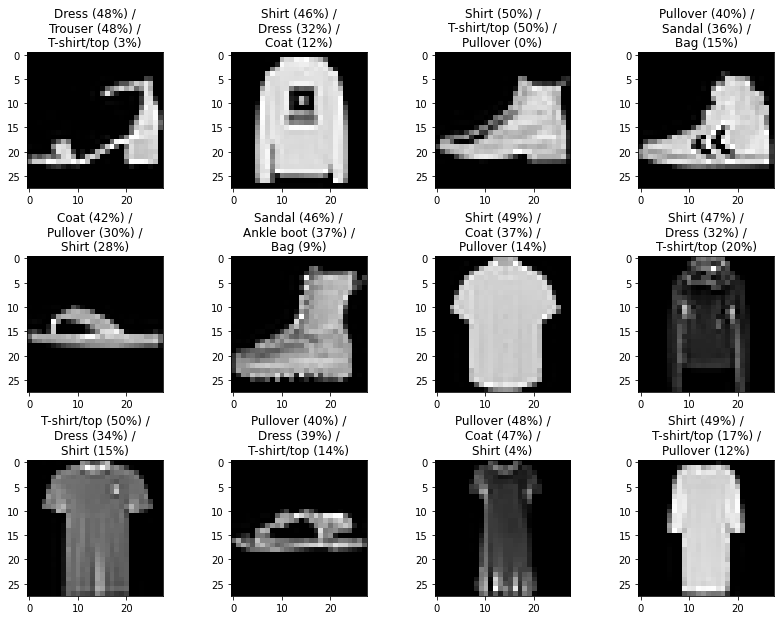

In [12]:
def evaluate_final_model_confidence(model):
    X_train, y_train, X_test, y_test = load_preprocessed_data()

    labels = get_labels()

    y_true = y_test.argmax(axis=1)
    
    y_pred_proba = model.predict(X_test)
    y_pred_highest_proba = y_pred_proba.max(axis=1).flatten()
    y_pred = y_pred_proba.argmax(axis=1)

    unsure = np.where(y_pred_highest_proba < 0.5)[0]
    sure = np.where(y_pred_highest_proba >= 0.99)[0]

    # Shows the actual accuracy rate of the model when it is at least 99% confident of its prediction
    print('99% Confidence Accuracy:', accuracy_score(y_true[sure], y_pred[sure]))

    wrong_class = {}

    for i in np.where(y_true[sure] != y_pred[sure])[0]:
        predicted = labels[y_pred[sure][i]]
        actual = labels[y_true[sure][i]]
        if (predicted, actual) in wrong_class:
            wrong_class[(predicted, actual)] += 1
        else:
            wrong_class[(predicted, actual)] = 1
    
    wrong_classes_sorted = sorted([(k[1], k[0], v) for k, v in wrong_class.items()], key=lambda x: (x[0], -x[2], x[1]))
    
    # Shows the frequency of its confident misclassifications
    for a, p, f in wrong_classes_sorted:
        print(f'Actual: {a:<12} | Predicted: {p:<12} | Frequency: {f:<}')

    # Shows the images which the model is unsure of,
    #   together with the alternative predictions
    #   and their corresponding confidence levels
    fig, ax = plt.subplots(3, 4, figsize=(14, 10))
    for j in range(12):
        ax[j // 4, j % 4].imshow(X_train[unsure[j]], cmap='gray')
        current_probs = y_pred_proba[unsure[j]]
        ax[j // 4, j % 4].set_title(' /\n'.join([f'{labels[current_probs.argsort()[::-1][i]]} ({np.sort(current_probs)[::-1][i] * 100:.0f}%)' for i in range(3)]))
    plt.subplots_adjust(hspace=0.5)
    plt.show()

evaluate_final_model_confidence(model)

## Conclusion
